<a href="https://colab.research.google.com/github/ayushkesh/Stock_Price_Prediction_RNN/blob/master/Stock_Price_Prediction(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction by using RNN {Deep Learning}

Real time data set obtained from google, 
I have used open feature to predict next day open value.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Importing the training datas test

In [0]:
dataset_train= pd.read_csv('/content/drive/My Drive/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Google_Stock_Price_Train.csv')

In [0]:
training_set= dataset_train.iloc[:,1:2].values

# Step 2: Feature Scaling 

In [0]:
from sklearn.preprocessing import MinMaxScaler
sca= MinMaxScaler()
training_set_scaled= sca.fit_transform(training_set)


# Step 3: Preprocessing , creating timestamp  
# 1 2 3 4 5
# 2 3 4 5 6
# 3 4 5 6 7
# 4 5 6 7 8
# .
# . 
# .


In [0]:
# lets make 70 timestep and 1 output  

X_train=[]
y_train=[]

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train= np.array(X_train), np.array(y_train)



Reshaping for RNN

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

# Step 4: Building RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

# first LSTM layer and Dropout regularization
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))





In [0]:
# Adding the output layer
regressor.add(Dense(units = 1))


In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [0]:

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0017
Epoch 2/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0018
Epoch 3/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0016
Epoch 4/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0018
Epoch 5/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0016
Epoch 6/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0017
Epoch 7/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0015
Epoch 8/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0014
Epoch 9/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0016
Epoch 10/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0016
Epoch 11/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0014
Epoch 12/100
1198/1198 [============================

# Step 5: Making the predictions and visualising the results

In [0]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sca.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sca.inverse_transform(predicted_stock_price)

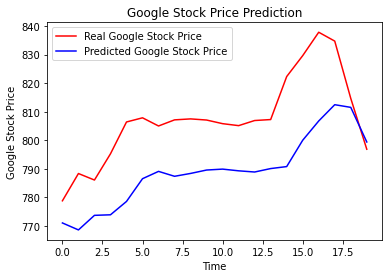

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()